In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')



import os
for dirname, _, filenames in os.walk('/Users/reenalboddul/Documents/stock'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/Users/reenalboddul/Documents/stock/prices-split-adjusted.csv
/Users/reenalboddul/Documents/stock/.DS_Store
/Users/reenalboddul/Documents/stock/fundamentals.csv
/Users/reenalboddul/Documents/stock/prices.csv
/Users/reenalboddul/Documents/stock/amazon-stock-prediction-nn-fbprophet.ipynb
/Users/reenalboddul/Documents/stock/securities.csv
/Users/reenalboddul/Documents/stock/.ipynb_checkpoints/amazon-stock-prediction-nn-fbprophet-checkpoint.ipynb


# Notebook is in progress

# Stock Prediction

# Read Data

In [2]:
df=pd.read_csv('/Users/reenalboddul/Documents/stock/prices.csv')

# Describe the data

In [3]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


# Check for Null Values

In [4]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

***No Null values in the entire dataset***

# Check Datatype of the features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


***Date & Symbol are in object datatype and rest are float datatype***

In [6]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


# Dataframe shape

In [7]:
df.shape

(851264, 7)

In [8]:
df['symbol'].nunique()

501

***There are 501 symbols in the datasets and in total there are 851264 rows with 7 columns***  
***Data set is good for analysis. however, since there are many company details are there. we will sample it with one Company***

# Sampling AMAZON from the dataset
GOOGL is the NYSE stock symbol for Google stocks. let us take that as a sample for our analysis.

In [9]:
df1=df[df['symbol']=='AMZN']

In [10]:
df1.head()

,date,symbol,open,close,low,high,volume
284,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
751,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
1219,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
1687,2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0
2155,2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0


In [11]:
df1.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,337.875664,337.899058,333.969688,341.464438,4.607596e+06
std,189.294231,189.109339,187.654696,190.525796,3.091557e+06
min,105.930000,108.610001,105.800003,111.290001,9.844000e+05
25%,192.962494,193.377506,190.284997,195.532501,2.741550e+06
50%,282.500000,282.915008,279.869995,285.074997,3.890700e+06
75%,398.425003,398.014999,393.799988,402.082496,5.384450e+06
max,845.789978,844.359985,840.599976,847.210022,4.242110e+07


In [12]:
np.round(df1.median(),2)

open          282.50
close         282.92
low           279.87
high          285.07
volume    3890700.00
dtype: float64

***All the Median of all the numeric values are lesser than mean, so the dataset is right skewed

In [13]:
df1['date']=pd.to_datetime(df1['date'])

In [14]:
print("Minimum date value : {}".format(df1['date'].min()))
print("Maximum date value : {}".format(df1['date'].max()))

Minimum date value : 2010-01-04 00:00:00
Maximum date value : 2016-12-30 00:00:00


***we have around 6 years of data***

# EDA

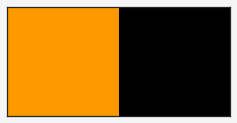

In [15]:
#importing ploting libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
colors = ['#FF9900','#000000']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'whitesmoke', 'figure.facecolor':'whitesmoke'})
sns.palplot(colors, size=2)

Text(0.5, 1.0, 'AMAZON Stock value changes since 2010')

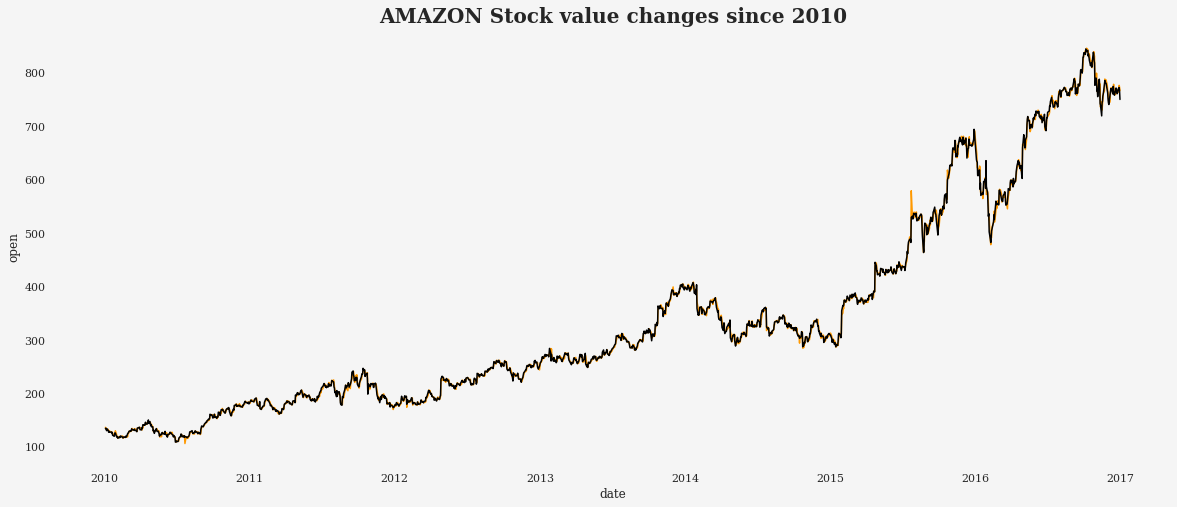

In [16]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df1, x='date',y='open')
ax=sns.lineplot(data=df1, x='date',y='close', color=colors[1]);
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)

plt.title("AMAZON Stock value changes since 2010", size=20, weight='bold')

Text(0.5, 1.0, 'Google Stock volume')

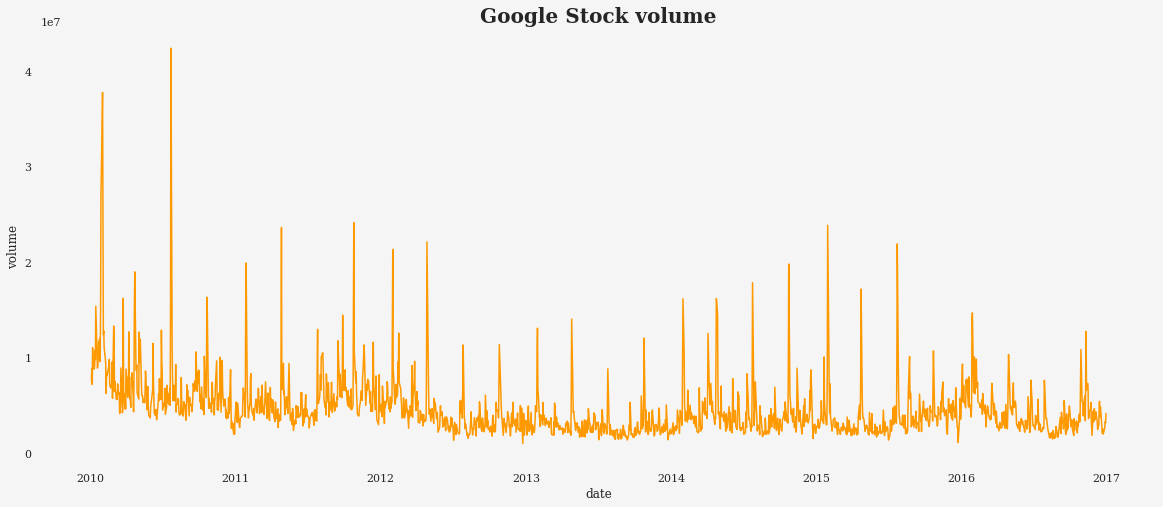

In [17]:
fig=plt.figure(figsize=(20,8))
ax=sns.lineplot(data=df1, x='date',y='volume')
#ax=sns.lineplot(data=df1, x='date',y='close', color=colors[1]);
for s in ['left','right','top','bottom']:
    ax.spines[s].set_visible(False)
plt.title("Google Stock volume", size=20, weight='bold')

# Univariated Analysis

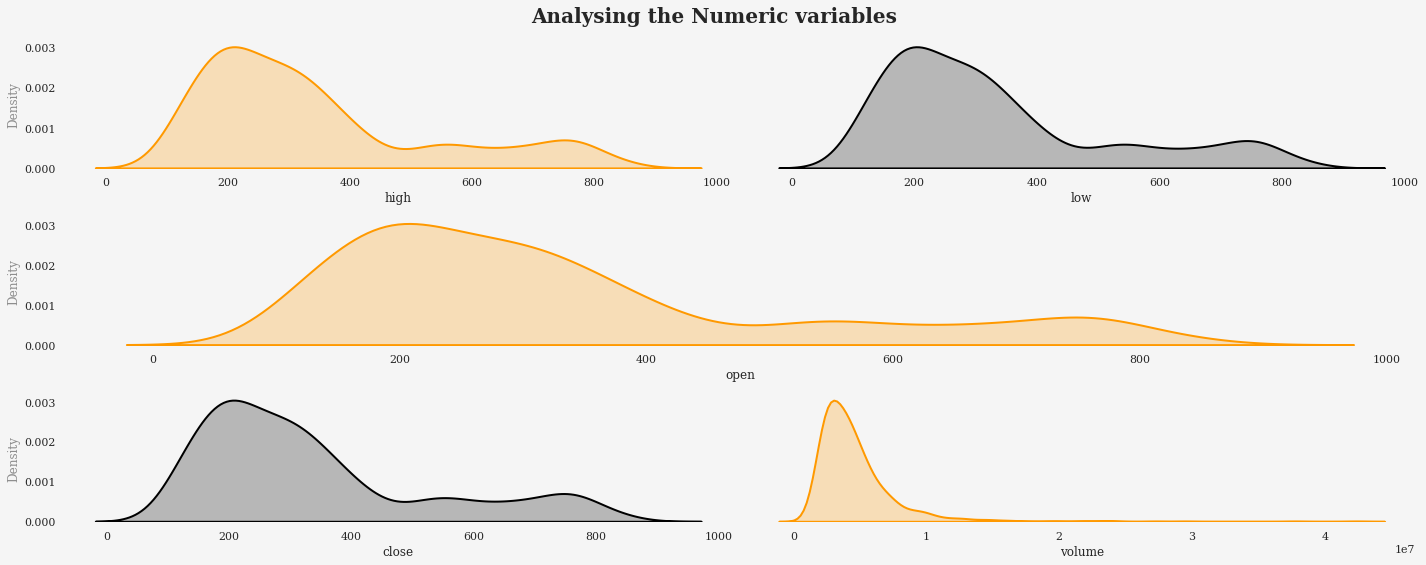

In [18]:
#integer columns
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Analysing the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.kdeplot(df1['high'], ax=ax['A'], color=colors[0], fill=True, linewidth=2)
sns.kdeplot(df1['low'], ax=ax['B'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(df1['open'], ax=ax['C'], color=colors[0],fill=True, linewidth=2)
sns.kdeplot(df1['close'], ax=ax['D'], color=colors[1],fill=True, linewidth=2)
sns.kdeplot(df1['volume'], ax=ax['E'], color=colors[0],fill=True, linewidth=2)
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

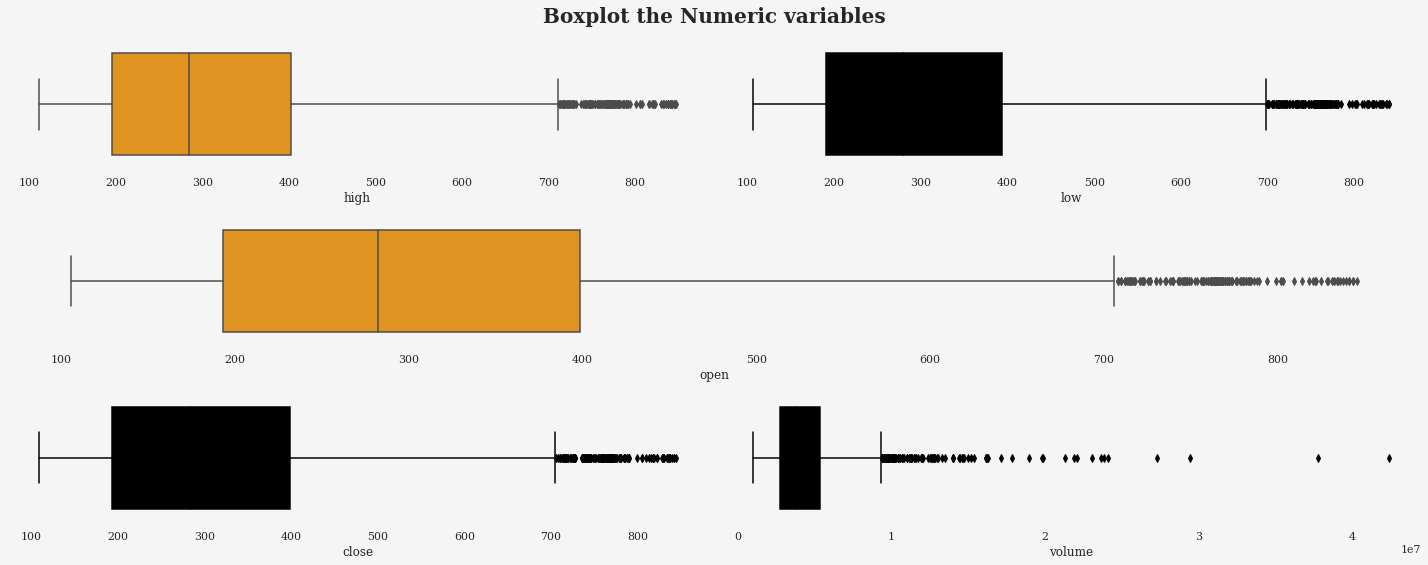

In [19]:
#integer columns
fig=plt.figure(figsize=(20,8), tight_layout=True)
plt.suptitle("Boxplot the Numeric variables", size=20, weight='bold')
ax=fig.subplot_mosaic("""AB
                         CC
                         DE""")
sns.boxplot(df1['high'], ax=ax['A'], color=colors[0])
sns.boxplot(df1['low'], ax=ax['B'], color=colors[1])
sns.boxplot(df1['open'], ax=ax['C'], color=colors[0])
sns.boxplot(df1['close'], ax=ax['D'], color=colors[1])
sns.boxplot(df1['volume'], ax=ax['E'], color=colors[1])
ax['B'].yaxis.set_visible(False)
ax['E'].yaxis.set_visible(False)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['A'].yaxis.label.set_alpha(0.5)
ax['C'].yaxis.label.set_alpha(0.5)
ax['D'].yaxis.label.set_alpha(0.5)
for s in ['left','right','top','bottom']:
    ax['A'].spines[s].set_visible(False)
    ax['B'].spines[s].set_visible(False)
    ax['C'].spines[s].set_visible(False)
    ax['D'].spines[s].set_visible(False)
    ax['E'].spines[s].set_visible(False)

***There seems to be ouliers in the data set, however, those values can't be considered as outlier as they may be extrem values during peak selling days***  
***Date column has been ingored as it is series of numbers***  
Let us analyse more for conclusion

# Categorical feature analysis  
** There is no categorical feature other than Symbol. as we have taken the Google stock as sample data, we will drop the Symbol feature.

In [20]:
df1.drop(['symbol'], axis=1, inplace=True)

# Bivariated & Multivariated Analysis

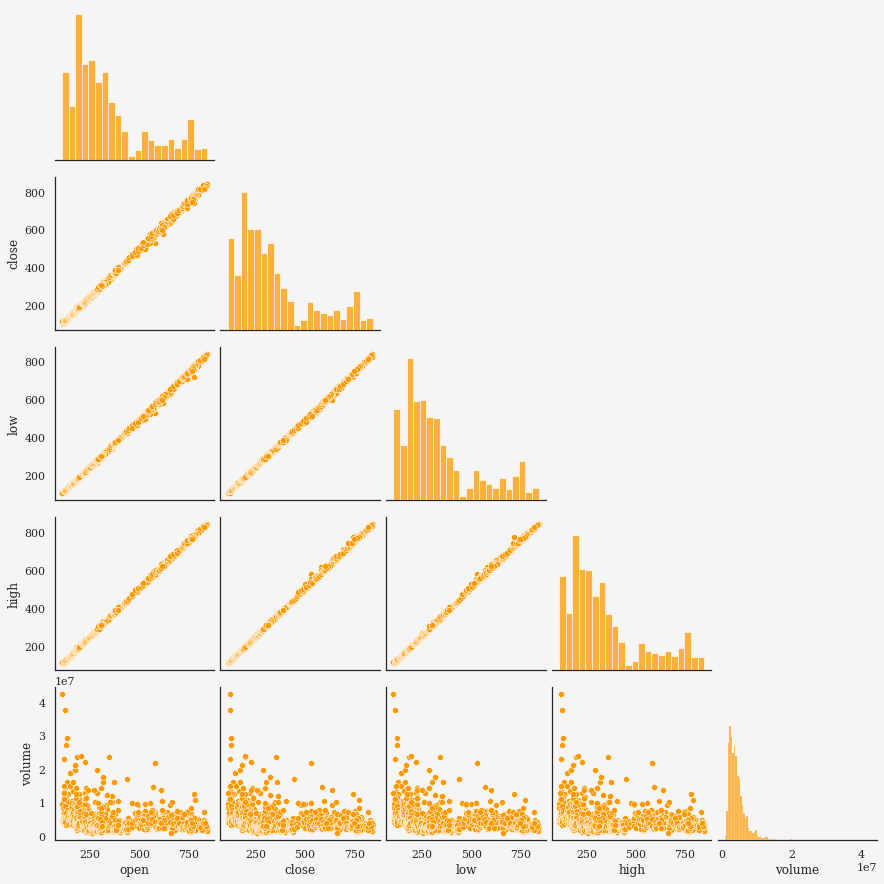

In [21]:
# we need to predict the closing price of the stock, lets us consider 'Close' feature as the Target variable. 
sns.pairplot(df1,corner=True)

In [22]:
df1.corr()['close']

open      0.999581
close     1.000000
low       0.999832
high      0.999811
volume   -0.238560
Name: close, dtype: float64

# Hypothesis test to find the Normality in the Dataset

In [23]:
from scipy.stats import levene, shapiro
int_cols=df1.select_dtypes(exclude='object').columns.to_list()

for i in int_cols:
    _, p_value=shapiro(df1[i])
    if p_value<0.05:
        print("Feature {} is normaly distributed".format(i))
    else:
        print("Feature {} is not normaly distributed".format(i))
        
    print("Normalitiy test p_value for featue -  {} is {}".format(i,np.round(p_value,3)))

Feature date is normaly distributed
Normalitiy test p_value for featue -  date is 0.0
Feature open is normaly distributed
Normalitiy test p_value for featue -  open is 0.0
Feature close is normaly distributed
Normalitiy test p_value for featue -  close is 0.0
Feature low is normaly distributed
Normalitiy test p_value for featue -  low is 0.0
Feature high is normaly distributed
Normalitiy test p_value for featue -  high is 0.0
Feature volume is normaly distributed
Normalitiy test p_value for featue -  volume is 0.0


# Correlation

<AxesSubplot:>

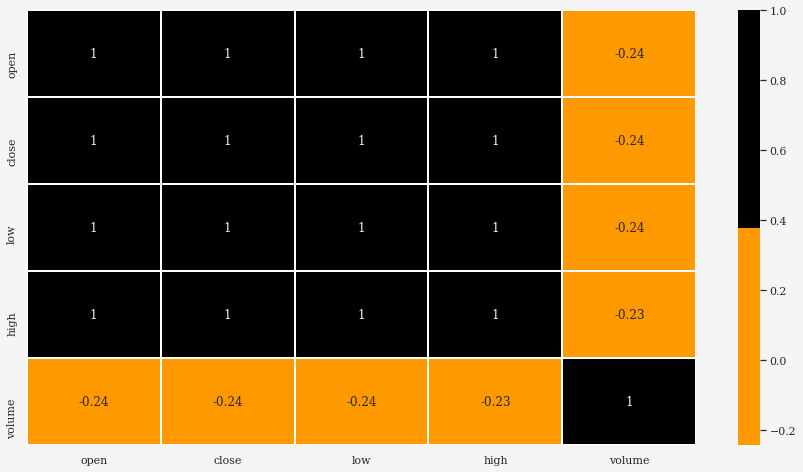

In [24]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(), annot=True, cmap=[colors[0],colors[1]], linecolor='white', linewidth=2 )

***feature Open, high, low are highly correlated to Target feature Close. we can use either one of the feature for prediction to avoid multicollinearity***

# Train Test Split

In [25]:
X=df1[['volume','open']]
y=df1['close']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=False, random_state=42)

# Normalizing the values

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

# Model Creation  
## basic Linear regression model

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
model = LinearRegression()
model.fit(X_train,y_train)
set_config(display='diagram')
pred=model.predict(X_test)
sc=np.round(model.score(X_test, y_test),2) * 100
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)

Text(800000, 540, 'Mean Absolute error : 66.39')

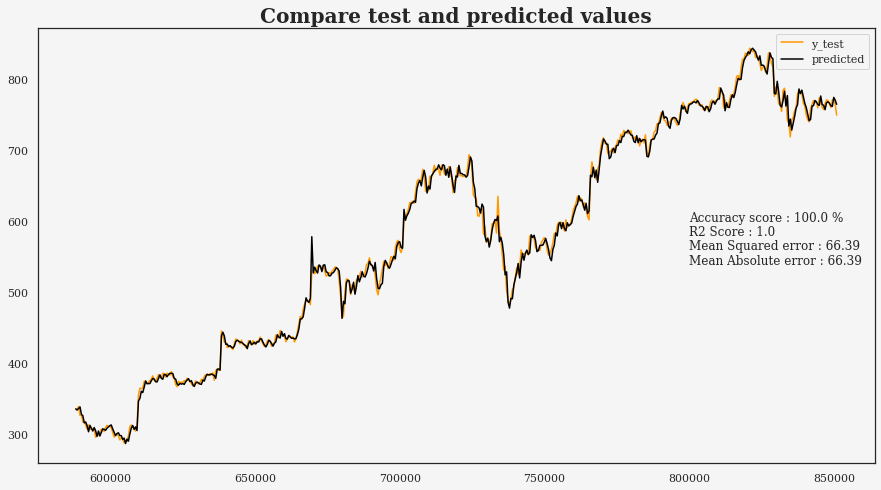

In [29]:
fig=plt.figure(figsize=(15,8))
p=pd.Series(pred, index=y_test.index)
plt.plot(y_test)
plt.plot(p)
plt.legend(['y_test','predicted'])
plt.title("Compare test and predicted values", size=20, weight='bold')
plt.text(x=800000, y=600,s='Accuracy score : {} %'.format(sc))
plt.text(x=800000, y=580,s='R2 Score : {}'.format(r2))
plt.text(x=800000, y=560,s='Mean Squared error : {}'.format(mse))
plt.text(x=800000, y=540,s='Mean Absolute error : {}'.format(mae))

# Try with LSTM

In [ ]:
X=df1[['open','high']]
y=df1['close']
length=100
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False, random_state=42)
training_set = X.iloc[:1000].values
test_set = X.iloc[1000:].values
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled=sc.transform(test_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(length, len(training_set)):
    X_train.append(training_set_scaled[i-length:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = []
y_test = []
for i in range(length, len(test_set)):
    X_test.append(test_set_scaled[i-length:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs = 100, batch_size = 32)

In [ ]:
loss = pd.DataFrame(model.history.history)
fig=plt.figure(figsize=(15,8))
plt.title("Validation loss Vs Trainiinverse_transformss", size=20, weight='bold')
plt.plot(loss)

In [ ]:
pred=model.predict(X_test)
test=pd.DataFrame(columns=['test','pred'])
test['test']=y_test
test['pred']=pred.flatten()
test

In [ ]:
fig=plt.figure(figsize=(15,8))
plt.title("Test vs Predicted value", size=20, weight='bold')
plt.plot(test)
plt.legend(['test','predict'])
r2=np.round(r2_score(y_test,pred),2)
mse=np.round(mean_squared_error(y_test,pred),2)
mae=np.round(mean_squared_error(y_test,pred),2)
plt.text(x=500, y=1.5,s='R2 Score : {}'.format(r2))
plt.text(x=500, y=1.35,s='Mean Squared error : {}'.format(mse))
plt.text(x=500, y=1.25,s='Mean Absolute error : {}'.format(mae))

# Try with FBProphet

In [ ]:
from fbprophet import Prophet
df_p = df1[['date','close']]
df_p.columns=['ds','y']

split_data = df_p.index.max()-100000
train = df_p.loc[df_p.index<=split_data].copy()
test=df_p.loc[df_p.index>split_data].copy()
train.set_index('ds',inplace=True)
test.set_index('ds',inplace=True)
train.reset_index(inplace=True)
test.reset_index(inplace=True)

#Model creation
model=Prophet()
model.fit(train)

#model prediction
pred=model.predict(test)

In [ ]:
test_pred=pd.DataFrame(columns=['ds','test','predict','pred_lower','pred_high'], index=test.index)
test_pred['test']=test['y']
test_pred['ds']=test['ds']
test_pred['predict']=pred['yhat']
test_pred['pred_lower']=pred['yhat_lower']
test_pred['pred_high']=pred['yhat_upper']

In [ ]:
#plotting Test vs Predicted
fig=plt.figure(figsize=(15,8))
plt.title("Test Vs Prediction", size=20, weight='bold')
sns.lineplot(data=test_pred,x='ds',y='test')
sns.lineplot(data=test_pred,x='ds',y='predict')

r2=np.round(r2_score(test_pred['test'],test_pred['predict']),2)
mse=np.round(mean_squared_error(test_pred['test'],test_pred['predict']),2)
mae=np.round(mean_squared_error(test_pred['test'],test_pred['predict']),2)
plt.text(x=mdates.datestr2num('2016-10'), y=700,s='R2 Score : {}'.format(r2))
plt.text(x=mdates.datestr2num('2016-10'), y=680,s='Mean Squared error : {}'.format(mse))
plt.text(x=mdates.datestr2num('2016-10'), y=660,s='Mean Absolute error : {}'.format(mae))

In [ ]:
fig=plt.figure(figsize=(15,8))
plt.title("Test Vs Prediction", size=20, weight='bold')
sns.lineplot(data=train,x='ds',y='y')
sns.lineplot(data=test_pred,x='ds',y='predict')
sns.lineplot(data=test_pred,x='ds',y='test', alpha=0.5, ls='--', color='black')

r2=np.round(r2_score(test_pred['test'],test_pred['predict']),2)
mse=np.round(mean_squared_error(test_pred['test'],test_pred['predict']),2)
mae=np.round(mean_squared_error(test_pred['test'],test_pred['predict']),2)
plt.text(x=mdates.datestr2num('2015'), y=300,s='R2 Score : {}'.format(r2))
plt.text(x=mdates.datestr2num('2015'), y=260,s='Mean Squared error : {}'.format(mse))
plt.text(x=mdates.datestr2num('2015'), y=220,s='Mean Absolute error : {}'.format(mae))
plt.legend(['Train','Predict','Test'])